# Portfolio Construction and Analysis

## Objectives
Just reasearch and analyze different datasets

In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import portfolio_construction_toolkit.all as pc
import sys
sys.path.insert(0, 'C:\\Users\\user\\Documents\\GitHub\\Portfolio-Construction-and-Analysis\\python_files')
import functions_1 as fnc
import edhec_risk_kit_127 as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
r12 = pd.read_csv(r'C:\Users\user\Documents\GitHub\Portfolio-Construction-and-Analysis\Data\cleaned_data\historical_returns_data_1.csv', parse_dates=True, index_col='Date')

In [120]:
fnc.start_dates(r12)

{'S&P 500': Timestamp('1928-01-03 00:00:00'),
 'Vanguard High Yield Corporate Fund': Timestamp('1980-01-03 00:00:00'),
 'Vanguard Small Cap Index Fund': Timestamp('1980-01-03 00:00:00'),
 'Vanguard Value Index Fund': Timestamp('1992-11-02 00:00:00'),
 'SPDR S&P 500 ETF Trust': Timestamp('1993-02-01 00:00:00'),
 'Vanguard Total Intl Stock Idx Fund': Timestamp('1996-04-30 00:00:00'),
 'Vanguard Mid Cap Index Fund': Timestamp('1998-05-22 00:00:00'),
 'Vanguard Small Cap Value Index Fund': Timestamp('1998-05-22 00:00:00'),
 'Vanguard Real Estate Index Fund': Timestamp('2004-09-30 00:00:00'),
 'SPDR Gold Shares': Timestamp('2004-11-19 00:00:00'),
 'Vanguard Emerging Markets Stock Index Fund': Timestamp('2005-03-11 00:00:00'),
 'iShares J.P. Morgan USD Emerging Markets Bond ETF': Timestamp('2007-12-20 00:00:00')}

In [121]:
r12 = pc.change_timeframe(r12, 'M')
r12 = r12.loc['2007':]
r12.shape

(200, 12)

In [122]:
er12 = pc.annualize_returns(r12, 12)

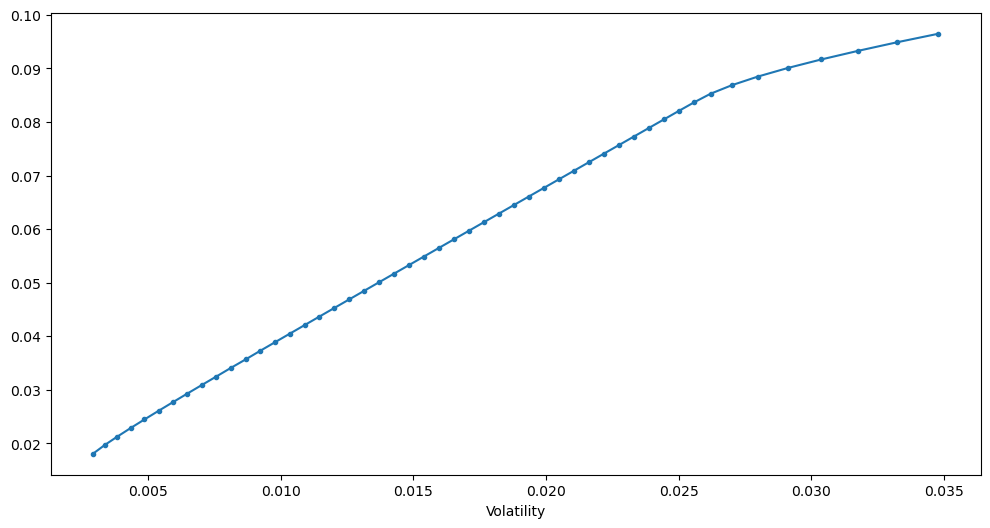

In [123]:
bct_r12 = pc.plot_ef(50, er12, r12.cov())

<Axes: >

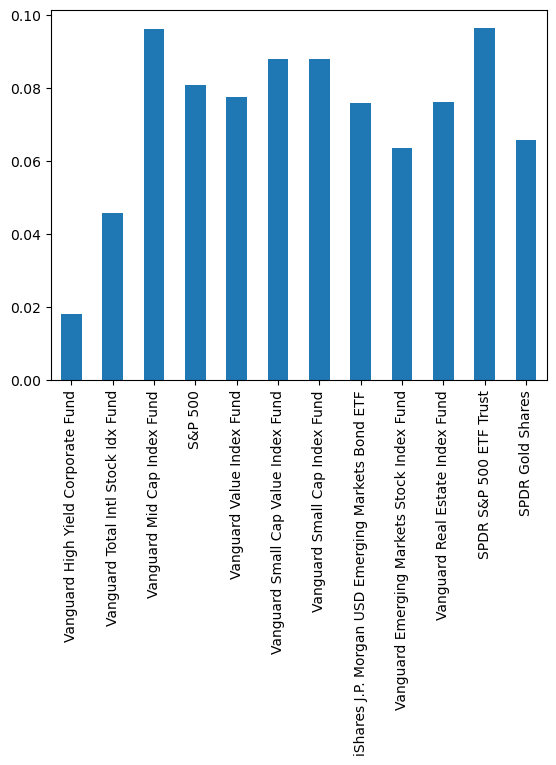

In [124]:
pc.annualize_returns(r12, 12).plot(kind='bar')

In [125]:
r11 = r12.drop(columns='Vanguard High Yield Corporate Fund')

In [126]:
er11 = er12.drop('Vanguard High Yield Corporate Fund')

<Axes: xlabel='Volatility'>

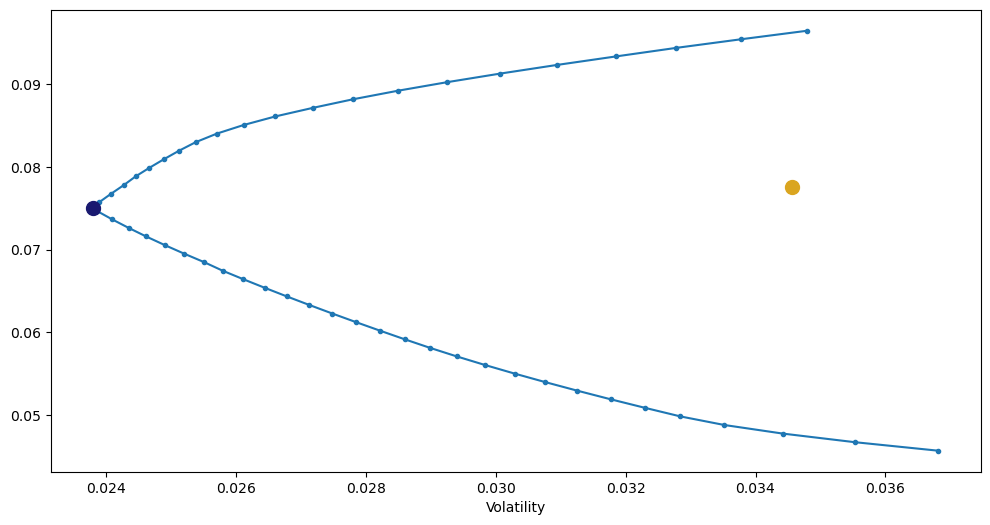

In [129]:
pc.plot_ef(50, er11, r11.cov(), show_ew=True, show_gmv=True, riskfree_rate=0.02)

In [150]:
pc.gmv(r11.cov(), er11)['Weights']

0    [2.9942264510175394e-13, 3.385199494121874e-12...
Name: Weights, dtype: object

In [ ]:
pc.weights_change()